# Based on the Data set predict person is suffering from heart disease or not

### 1.) Importing Libraries & Data Analysis

Pandas : Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and
          its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in
          rows of observations and columns of variables.
            
            
Numpy  : NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection
          of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

        
matplot : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
           It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits
           like Tkinter,wxPython, Qt, or GTK+.
        
        
seaborn : statistical data visualization. Seaborn is a Python data visualization library based on matplotlib.
           It provides a high-level interface for drawing attractive and informative statistical graphics.
        
        
%matplotlib inline : Use to show diagrams below the coding section. Call it only once.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# calling our csv file (Your Dataset should be of CSV format)
# Steps to create your Excel file into CSV : Ctrl + S  } Format-->CSV

data = pd.read_csv("D:\corona\heart_Disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious.
Here's what they mean,

 1.age: The person's age in years

 2.sex: The person's sex (1 = male, 0 = female)

 3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain,
                                          Value 4: asymptomatic)

 4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

 5.chol: The person's cholesterol measurement in mg/dl

 6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

 7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality,
                                        2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

 8.thalach: The person's maximum heart rate achieved

 9.exang: Exercise induced angina (1 = yes; 0 = no)

 10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

 11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

 12.ca: The number of major vessels (0-3)

 13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

 14.target: Heart disease (0 = no, 1 = yes)

In [3]:
# Give an complete statistical description of the Data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Gives Complete information of the data values such as Number of Data present, Null or Not-Null, Data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 2.) Feature Engineering

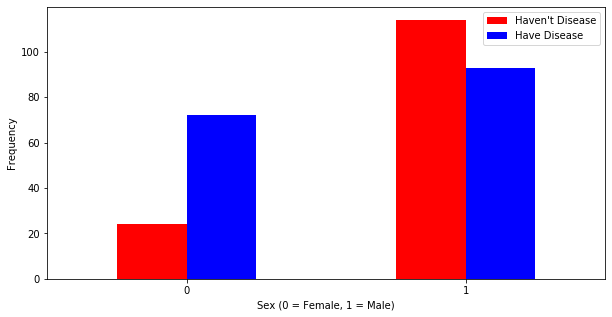

In [5]:
# This will show us people who suffer from heart desiese with respect to the sex i.e Male and Female

pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(10,5),color=['red','blue' ])

plt.xlabel('Sex (0 = Female, 1 = Male)')             # X-Label 

plt.xticks(rotation=0)                               #Get or set the current tick locations and labels of the x-axis.

plt.legend(["Haven't Disease", "Have Disease"])      # legend = Index

plt.ylabel('Frequency')                              # X-Label

plt.show()                                           # Help to show our diagram

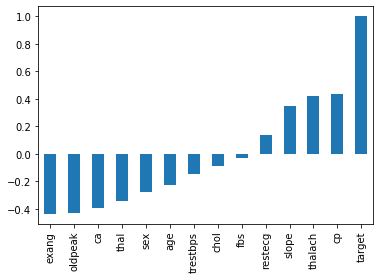

In [6]:
# This will show you the co-orelation between features respect to our target val

# .corr        : Help us to show the correlation between the values
# .sort_values : By default assendig = True
# .plot        : Use to plot
# kind=" "     : ‘bar’ or ‘barh’ for bar plots, ‘hist’ for histogram,‘box’ for boxplot,‘kde’ or ‘density’ for density plots,
#                area’ for area plots,‘scatter’ for scatter plots,‘hexbin’ for hexagonal bin plots,‘pie’ for pie plots

data.corr()['target'].sort_values().plot(kind='bar')

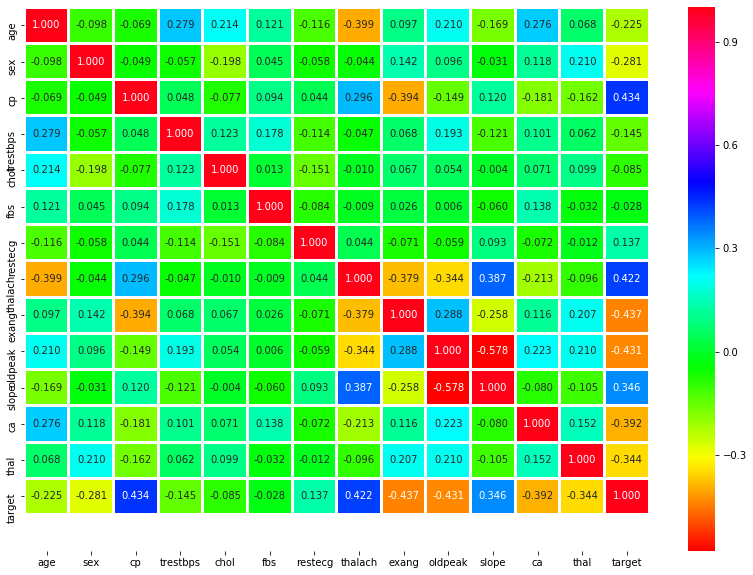

In [7]:
# This will give the correlation between that features

# Example : age in Y-axis and age in X-axis will have the maximum correlation that's why it's dark in color

plt.figure(figsize=(14,10))                                       # Help to set figure size                                     

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
         
# annot : Help to see the value in box
# cmap : The mapping from data values to color space.
# fmt : String formatting code to use when adding annotations.

plt.ylim(15,0)                                                     # show us exact number of values we want
plt.show()

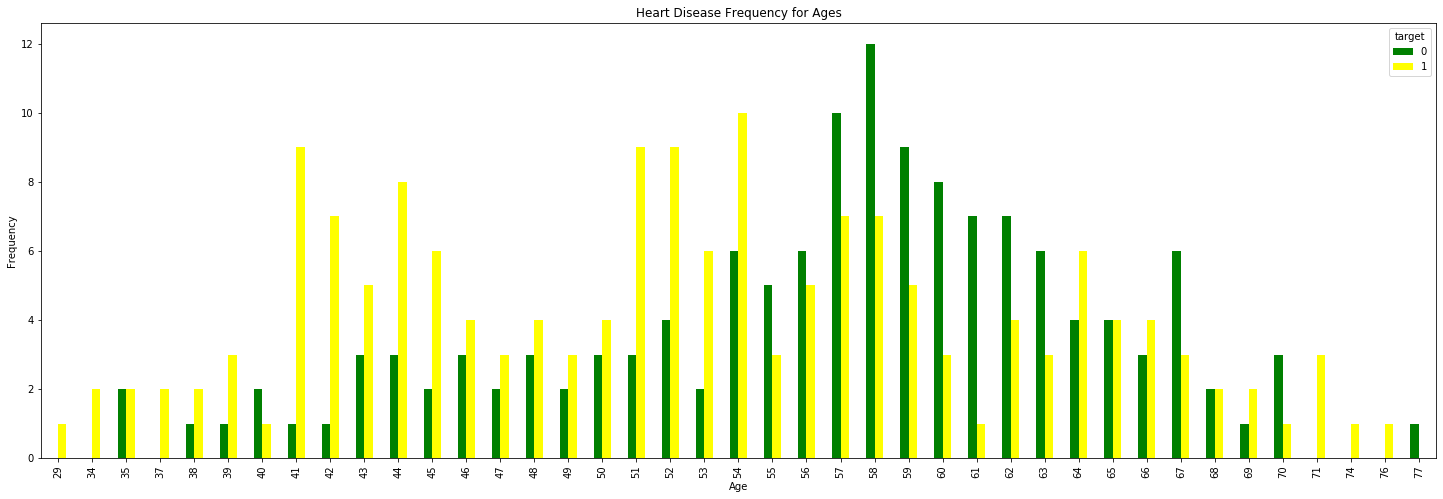

In [8]:
# This will show us Heart Disease Frequency for Ages

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['green','yellow' ]) 

# Target : YES/NO
# color : Green / Yellow

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Creating Dummy Variables for categorical data

In [9]:
# Categorical Variables : Categorical Variables are the variables that falls into certain categories.
#                         In Categorical Variable there is no order.

# https://www.infinitycodex.in/dummy-variable-in-machine-learning-what }  Visit this if you want to know about dummy variables
# https://www.infinitycodex.in/categoricaldummy-varibles-one-hot  }  Visit this if you want to know more about dummy variables

data = pd.get_dummies(data, columns=['cp','slope','thal','restecg'], drop_first=True)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,1,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,0,1,0


### 3.) Spliting Data into Training & Testing set

In [10]:
# The train_test_split function is for splitting a single dataset for two different purposes: training and testing.The testing 
# subset is for building your model.The testing subset is for using the model on unknown data to evaluate the performance of
# the model.


# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and
# for testing data. With this function, you don't need to divide the dataset manually.By default,Sklearn train_test_split will
# make random partitions for the two subsets. However, you can also specify a random state for the operation.



# .values      : This returns back the numpy array
# X, y         : The first parameter is the dataset you're selecting to use.
# train_size   : This parameter sets the size of the training dataset. There are three options: None, which is the default,
#                Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.
# test_size    : This parameter specifies the size of the testing dataset. The default state suits the training size.
#                It will be set to 0.25 if the training size is set to default.
# random_state : The default mode performs a random split using np.random. Alternatively, you can add an integer using an
#                exact number.


from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html } for complete knowledge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### 4.) Normalization

In [12]:
# Database normalization is the process of structuring a relational database in accordance with a series of so-called
#  normal forms in order to reduce data redundancy and improve data integrity.



# Transform features by scaling each feature to a given range.

# MinMaxScaler : This estimator scales and translates each feature individually such that it is in the given range on 
#                the training set, e.g. between zero and one.



# By fit the imputer calculates the means of columns from some data, and by transform it applies those means to some data
# (which is just replacing missing values with the means). If both these data are the same (i.e. the data for calculating the
# means and the data that means are applied to) you can use fit_transform which is basically a fit followed by a transform.


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4.) Create & Compile our ANN Model

In [13]:
# Sequential : is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output
# tensor. A Sequential model is not appropriate when: Your model has multiple inputs or multiple outputs. Any of your layers has
# multiple inputs or multiple outputs.



# Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. 
# Dense layer does the below operation on the input and return the output.


# How to Choose an optimizer & loss?
# --> It depends on what kind of problem we are trying to solve.

# MULTI-CLASS CLASSIFICATION PROBLEM :
# model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

# BINARY CLASSIFICATION PROBLEM :
# model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

# REGRESSION PROBLEM :
# model.compile(optimizer="rmsprop", loss="mse")



# relu  : Rectified Linear Unit 
# https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100,activation='relu'))         # 100 : Number of nodes
model.add(Dense(50,activation='relu'))          # 50 : Number of nodes   
model.add(Dense(25,activation='relu'))          # 25 : Number of nodes
model.add(Dense(15,activation='relu'))          # 15 : Number of nodes
model.add(Dense(5,activation='relu'))           # 5 : Number of nodes

model.add(Dense(1,activation='sigmoid'))        # activation="sigmoid" : bcz it represents sigmoid curve i.e 1 or 0

# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model.compile(loss = "binary_crossentropy", optimizer = 'adam')

model.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 4s 15ms/sample - loss: 0.6765 - val_loss: 0.6770
Epoch 2/1000
242/242 [==============================] - 0s 199us/sample - loss: 0.6303 - val_loss: 0.6342
Epoch 3/1000
242/242 [==============================] - 0s 197us/sample - loss: 0.5881 - val_loss: 0.6007
Epoch 4/1000
242/242 [==============================] - 0s 249us/sample - loss: 0.5521 - val_loss: 0.5703
Epoch 5/1000
242/242 [==============================] - 0s 194us/sample - loss: 0.5321 - val_loss: 0.5550
Epoch 6/1000
242/242 [==============================] - 0s 211us/sample - loss: 0.5149 - val_loss: 0.5457
Epoch 7/1000
242/242 [==============================] - 0s 185us/sample - loss: 0.5003 - val_loss: 0.5443
Epoch 8/1000
242/242 [==============================] - 0s 190us/sample - loss: 0.4873 - val_loss: 0.5396
Epoch 9/1000
242/242 [==============================] - 0s 190us/sample - loss: 0.4777 - val_loss: 0.5307
Ep

242/242 [==============================] - 0s 200us/sample - loss: 0.0039 - val_loss: 0.8035
Epoch 154/1000
242/242 [==============================] - 0s 227us/sample - loss: 0.0037 - val_loss: 0.8054
Epoch 155/1000
242/242 [==============================] - 0s 173us/sample - loss: 0.0036 - val_loss: 0.8074
Epoch 156/1000
242/242 [==============================] - 0s 181us/sample - loss: 0.0036 - val_loss: 0.8152
Epoch 157/1000
242/242 [==============================] - 0s 171us/sample - loss: 0.0033 - val_loss: 0.8185
Epoch 158/1000
242/242 [==============================] - 0s 169us/sample - loss: 0.0032 - val_loss: 0.8191
Epoch 159/1000
242/242 [==============================] - 0s 167us/sample - loss: 0.0032 - val_loss: 0.8217
Epoch 160/1000
242/242 [==============================] - 0s 157us/sample - loss: 0.0032 - val_loss: 0.8294
Epoch 161/1000
242/242 [==============================] - 0s 169us/sample - loss: 0.0031 - val_loss: 0.8261
Epoch 162/1000
242/242 [===================

242/242 [==============================] - 0s 198us/sample - loss: 1.9536e-04 - val_loss: 1.1490
Epoch 302/1000
242/242 [==============================] - 0s 165us/sample - loss: 1.9603e-04 - val_loss: 1.1506
Epoch 303/1000
242/242 [==============================] - 0s 148us/sample - loss: 1.8650e-04 - val_loss: 1.1550
Epoch 304/1000
242/242 [==============================] - 0s 169us/sample - loss: 1.8104e-04 - val_loss: 1.1579
Epoch 305/1000
242/242 [==============================] - 0s 140us/sample - loss: 1.8292e-04 - val_loss: 1.1587
Epoch 306/1000
242/242 [==============================] - 0s 149us/sample - loss: 1.8205e-04 - val_loss: 1.1597
Epoch 307/1000
242/242 [==============================] - 0s 140us/sample - loss: 1.9694e-04 - val_loss: 1.1578
Epoch 308/1000
242/242 [==============================] - 0s 151us/sample - loss: 1.7555e-04 - val_loss: 1.1627
Epoch 309/1000
242/242 [==============================] - 0s 165us/sample - loss: 1.7449e-04 - val_loss: 1.1648
Epoch 3

242/242 [==============================] - 0s 133us/sample - loss: 3.8204e-05 - val_loss: 1.3325
Epoch 448/1000
242/242 [==============================] - 0s 136us/sample - loss: 3.7952e-05 - val_loss: 1.3337
Epoch 449/1000
242/242 [==============================] - 0s 128us/sample - loss: 3.7595e-05 - val_loss: 1.3359
Epoch 450/1000
242/242 [==============================] - 0s 141us/sample - loss: 3.8146e-05 - val_loss: 1.3396
Epoch 451/1000
242/242 [==============================] - 0s 157us/sample - loss: 3.7127e-05 - val_loss: 1.3399
Epoch 452/1000
242/242 [==============================] - 0s 141us/sample - loss: 3.7713e-05 - val_loss: 1.3391
Epoch 453/1000
242/242 [==============================] - 0s 177us/sample - loss: 3.5863e-05 - val_loss: 1.3419
Epoch 454/1000
242/242 [==============================] - 0s 140us/sample - loss: 3.5907e-05 - val_loss: 1.3430
Epoch 455/1000
242/242 [==============================] - 0s 137us/sample - loss: 3.6389e-05 - val_loss: 1.3442
Epoch 4

242/242 [==============================] - 0s 136us/sample - loss: 2.2570e-05 - val_loss: 1.4041
Epoch 521/1000
242/242 [==============================] - 0s 150us/sample - loss: 2.1871e-05 - val_loss: 1.4020
Epoch 522/1000
242/242 [==============================] - 0s 136us/sample - loss: 2.0939e-05 - val_loss: 1.4016
Epoch 523/1000
242/242 [==============================] - 0s 152us/sample - loss: 2.0836e-05 - val_loss: 1.4019
Epoch 524/1000
242/242 [==============================] - 0s 149us/sample - loss: 2.0879e-05 - val_loss: 1.4014
Epoch 525/1000
242/242 [==============================] - 0s 140us/sample - loss: 2.0587e-05 - val_loss: 1.4029
Epoch 526/1000
242/242 [==============================] - 0s 152us/sample - loss: 2.0149e-05 - val_loss: 1.4051
Epoch 527/1000
242/242 [==============================] - 0s 157us/sample - loss: 2.0083e-05 - val_loss: 1.4061
Epoch 528/1000
242/242 [==============================] - 0s 148us/sample - loss: 1.9885e-05 - val_loss: 1.4067
Epoch 5

242/242 [==============================] - 0s 132us/sample - loss: 8.1183e-06 - val_loss: 1.5019
Epoch 667/1000
242/242 [==============================] - 0s 148us/sample - loss: 8.2250e-06 - val_loss: 1.5057
Epoch 668/1000
242/242 [==============================] - 0s 150us/sample - loss: 7.9802e-06 - val_loss: 1.5043
Epoch 669/1000
242/242 [==============================] - 0s 132us/sample - loss: 7.9387e-06 - val_loss: 1.5056
Epoch 670/1000
242/242 [==============================] - 0s 139us/sample - loss: 7.7772e-06 - val_loss: 1.5049
Epoch 671/1000
242/242 [==============================] - 0s 140us/sample - loss: 7.7728e-06 - val_loss: 1.5055
Epoch 672/1000
242/242 [==============================] - 0s 128us/sample - loss: 7.9456e-06 - val_loss: 1.5043
Epoch 673/1000
242/242 [==============================] - 0s 135us/sample - loss: 7.6653e-06 - val_loss: 1.5061
Epoch 674/1000
242/242 [==============================] - 0s 132us/sample - loss: 7.5779e-06 - val_loss: 1.5074
Epoch 6

242/242 [==============================] - 0s 136us/sample - loss: 5.2051e-06 - val_loss: 1.5475
Epoch 740/1000
242/242 [==============================] - 0s 146us/sample - loss: 5.1898e-06 - val_loss: 1.5479
Epoch 741/1000
242/242 [==============================] - 0s 136us/sample - loss: 5.1949e-06 - val_loss: 1.5478
Epoch 742/1000
242/242 [==============================] - 0s 150us/sample - loss: 5.1215e-06 - val_loss: 1.5482
Epoch 743/1000
242/242 [==============================] - 0s 148us/sample - loss: 5.1163e-06 - val_loss: 1.5501
Epoch 744/1000
242/242 [==============================] - 0s 169us/sample - loss: 5.0587e-06 - val_loss: 1.5504
Epoch 745/1000
242/242 [==============================] - 0s 139us/sample - loss: 5.1029e-06 - val_loss: 1.5509
Epoch 746/1000
242/242 [==============================] - 0s 148us/sample - loss: 4.9848e-06 - val_loss: 1.5521
Epoch 747/1000
242/242 [==============================] - 0s 147us/sample - loss: 4.9671e-06 - val_loss: 1.5524
Epoch 7

242/242 [==============================] - 0s 192us/sample - loss: 2.3635e-06 - val_loss: 1.6293
Epoch 885/1000
242/242 [==============================] - 0s 177us/sample - loss: 2.3415e-06 - val_loss: 1.6296
Epoch 886/1000
242/242 [==============================] - 0s 165us/sample - loss: 2.3388e-06 - val_loss: 1.6307
Epoch 887/1000
242/242 [==============================] - 0s 168us/sample - loss: 2.3246e-06 - val_loss: 1.6313
Epoch 888/1000
242/242 [==============================] - 0s 202us/sample - loss: 2.2955e-06 - val_loss: 1.6315
Epoch 889/1000
242/242 [==============================] - 0s 185us/sample - loss: 2.2928e-06 - val_loss: 1.6326
Epoch 890/1000
242/242 [==============================] - 0s 165us/sample - loss: 2.2879e-06 - val_loss: 1.6337
Epoch 891/1000
242/242 [==============================] - 0s 141us/sample - loss: 2.2861e-06 - val_loss: 1.6334
Epoch 892/1000
242/242 [==============================] - 0s 198us/sample - loss: 2.2601e-06 - val_loss: 1.6346
Epoch 8

In [14]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 

# loss = Loss of my training set
# val_loss = Loss of my test set

losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.676451,0.677001
1,0.630255,0.634155
2,0.588084,0.600685
3,0.552142,0.570293
4,0.532135,0.554970
...,...,...
995,0.000001,1.685853
996,0.000001,1.687653
997,0.000001,1.687578
998,0.000001,1.687310


In [15]:
# Stop automatically stop training data based of a loss condition on the validation data passed during the model.fit()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=85) # verbose = 1 : we will see bunch of output

model.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 0s 210us/sample - loss: 1.3049e-06 - val_loss: 1.6900
Epoch 2/1000
242/242 [==============================] - 0s 152us/sample - loss: 1.2813e-06 - val_loss: 1.6932
Epoch 3/1000
242/242 [==============================] - 0s 174us/sample - loss: 1.3076e-06 - val_loss: 1.6940
Epoch 4/1000
242/242 [==============================] - 0s 177us/sample - loss: 1.3052e-06 - val_loss: 1.6933
Epoch 5/1000
242/242 [==============================] - 0s 167us/sample - loss: 1.2892e-06 - val_loss: 1.6923
Epoch 6/1000
242/242 [==============================] - 0s 210us/sample - loss: 1.2719e-06 - val_loss: 1.6924
Epoch 7/1000
242/242 [==============================] - 0s 187us/sample - loss: 1.2615e-06 - val_loss: 1.6927
Epoch 8/1000
242/242 [==============================] - 0s 192us/sample - loss: 1.2564e-06 - val_loss: 1.6930
Epoch 9/1000
242/242 [==============================] - 0s 240us/sample - l

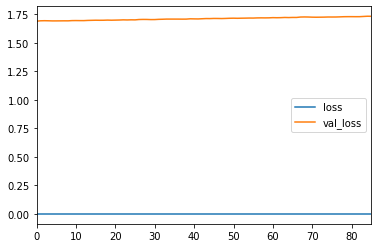

In [16]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 


# loss = Loss of my training set
# val_loss = Loss of my test set

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
# Dropout help us to prevent overfitting


# Dropout : It can be added to layers to "turn-off" neurons during training to prevent overfitting.
#            Basically each Dropout layer will "drop" a user-defined % of neurons units in the previous layer every batch.


# (0.5) is rate : Rate is the probability that we are going to randomly turnoff the actual neuron (0 : None, 1 : 100%)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(25,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(5,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))


# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model1.compile(loss = "binary_crossentropy",optimizer='adam')

model1.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 1s 6ms/sample - loss: 0.7392 - val_loss: 0.6946
Epoch 2/1000
242/242 [==============================] - 0s 173us/sample - loss: 0.7345 - val_loss: 0.6932
Epoch 3/1000
242/242 [==============================] - 0s 176us/sample - loss: 0.7154 - val_loss: 0.6935
Epoch 4/1000
242/242 [==============================] - 0s 181us/sample - loss: 0.7119 - val_loss: 0.6939
Epoch 5/1000
242/242 [==============================] - 0s 184us/sample - loss: 0.7008 - val_loss: 0.6943
Epoch 6/1000
242/242 [==============================] - 0s 194us/sample - loss: 0.6992 - val_loss: 0.6946
Epoch 7/1000
242/242 [==============================] - 0s 194us/sample - loss: 0.7082 - val_loss: 0.6947
Epoch 8/1000
242/242 [==============================] - 0s 178us/sample - loss: 0.6886 - val_loss: 0.6949
Epoch 9/1000
242/242 [==============================] - 0s 169us/sample - loss: 0.6975 - val_loss: 0.6950
Epo

242/242 [==============================] - 0s 175us/sample - loss: 0.4223 - val_loss: 0.3925
Epoch 154/1000
242/242 [==============================] - 0s 154us/sample - loss: 0.4434 - val_loss: 0.3777
Epoch 155/1000
242/242 [==============================] - 0s 151us/sample - loss: 0.4505 - val_loss: 0.3652
Epoch 156/1000
242/242 [==============================] - 0s 149us/sample - loss: 0.4463 - val_loss: 0.3566
Epoch 157/1000
242/242 [==============================] - 0s 169us/sample - loss: 0.4234 - val_loss: 0.3537
Epoch 158/1000
242/242 [==============================] - 0s 163us/sample - loss: 0.4425 - val_loss: 0.3560
Epoch 159/1000
242/242 [==============================] - 0s 171us/sample - loss: 0.4416 - val_loss: 0.3533
Epoch 160/1000
242/242 [==============================] - 0s 170us/sample - loss: 0.4319 - val_loss: 0.3505
Epoch 161/1000
242/242 [==============================] - 0s 161us/sample - loss: 0.3853 - val_loss: 0.3382
Epoch 162/1000
242/242 [===================

Epoch 229/1000
242/242 [==============================] - 0s 260us/sample - loss: 0.3733 - val_loss: 0.3799
Epoch 230/1000
242/242 [==============================] - 0s 260us/sample - loss: 0.3621 - val_loss: 0.3709
Epoch 231/1000
242/242 [==============================] - 0s 214us/sample - loss: 0.3599 - val_loss: 0.3712
Epoch 232/1000
242/242 [==============================] - 0s 214us/sample - loss: 0.3538 - val_loss: 0.3749
Epoch 233/1000
242/242 [==============================] - 0s 194us/sample - loss: 0.3900 - val_loss: 0.3743
Epoch 234/1000
242/242 [==============================] - 0s 176us/sample - loss: 0.3608 - val_loss: 0.3778
Epoch 235/1000
242/242 [==============================] - 0s 210us/sample - loss: 0.3390 - val_loss: 0.3762
Epoch 236/1000
242/242 [==============================] - 0s 165us/sample - loss: 0.3370 - val_loss: 0.3883
Epoch 237/1000
242/242 [==============================] - 0s 177us/sample - loss: 0.3415 - val_loss: 0.4065
Epoch 238/1000
242/242 [====

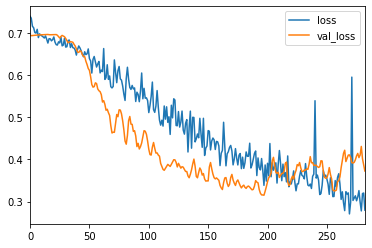

In [18]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 


# loss = Loss of my training set
# val_loss = Loss of my test set

model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [19]:
# It will return our models loss

model1.evaluate(X_test,y_test,verbose=0)    # verbose = 0 : we will not see bunch of output  

0.37236368167595785

### 5.) Check Model Accuracy

In [20]:
pred = model1.predict_classes(X_test)

In [21]:
# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 89%


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



In [22]:
# For detail explanation of confusion_matrix } https://www.infinitycodex.in/confusion-matrix-and-classification

print(confusion_matrix(y_test,pred))

[[26  6]
 [ 1 28]]


# Our Model is 89% accurate